# This notebook will focus on:

- Data loading and exploration

- Data cleaning (handling missing values, outliers, etc.)

- Initial checks and visualizations (e.g., distribution of target, correlation analysis, etc.)

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')  # To avoid non-critical warnings

### Input original file

In [3]:
path = '../data/raw/heart_2022_with_nans.csv'

In [4]:
# read data
df = pd.read_csv(path ,sep=',',encoding='utf-8')
df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
6073,Alaska,Female,Excellent,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"Yes, received Tdap",No,No
15588,Arizona,Male,Good,0.0,0.0,5 or more years ago,No,6.0,None of them,No,...,1.83,97.52,29.16,Yes,No,Yes,No,NaN,Yes,Yes
11730,Arizona,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.60,74.39,29.05,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
43519,Colorado,Female,Good,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.68,81.65,29.05,Yes,Yes,Yes,No,"Yes, received Tdap",No,No


In [5]:
print(f"Data Shape: {df.shape}")

Data Shape: (59903, 40)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59903 entries, 0 to 59902
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      59903 non-null  object 
 1   Sex                        59903 non-null  object 
 2   GeneralHealth              59728 non-null  object 
 3   PhysicalHealthDays         58124 non-null  float64
 4   MentalHealthDays           58407 non-null  float64
 5   LastCheckupTime            58642 non-null  object 
 6   PhysicalActivities         59744 non-null  object 
 7   SleepHours                 59174 non-null  float64
 8   RemovedTeeth               57274 non-null  object 
 9   HadHeartAttack             59398 non-null  object 
 10  HadAngina                  59277 non-null  object 
 11  HadStroke                  59627 non-null  object 
 12  HadAsthma                  59605 non-null  object 
 13  HadSkinCancer              59413 non-null  obj

In [7]:
# Check for missing values
print(df.isnull().sum())

State                            0
Sex                              0
GeneralHealth                  175
PhysicalHealthDays            1779
MentalHealthDays              1496
LastCheckupTime               1261
PhysicalActivities             159
SleepHours                     729
RemovedTeeth                  2629
HadHeartAttack                 505
HadAngina                      626
HadStroke                      276
HadAsthma                      298
HadSkinCancer                  490
HadCOPD                        345
HadDepressiveDisorder          431
HadKidneyDisease               292
HadArthritis                   393
HadDiabetes                    211
DeafOrHardOfHearing           3235
BlindOrVisionDifficulty       3390
DifficultyConcentrating       3807
DifficultyWalking             3827
DifficultyDressingBathing     3807
DifficultyErrands             4079
SmokerStatus                  5583
ECigaretteUsage               5617
ChestScan                     8380
RaceEthnicityCategor

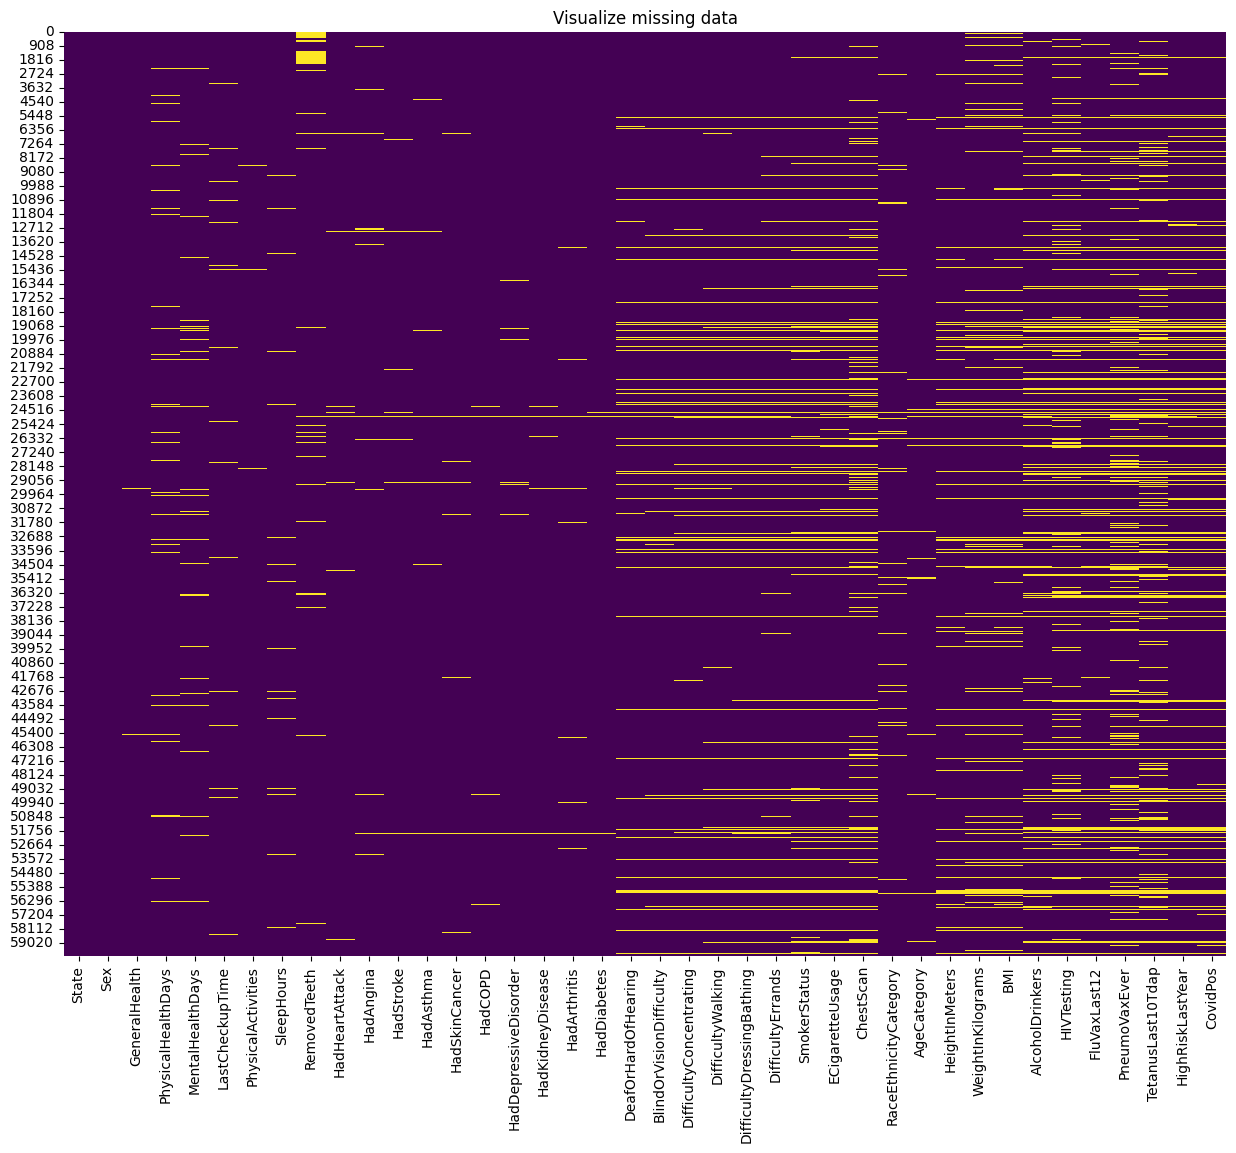

In [8]:
# Visualize missing data
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualize missing data')
plt.show()

### Missing Value Cleaning

In [ ]:
# Data 
# ing - Handle missing values
sys.path.append('..')  

# Import function
from src.data_preprocessing.clean_data import clean_data

input_path = '../data/raw/heart_2022_with_nans.csv'
output_path = '../data/cleaned/heart_2022_cleaned.csv'

clean_data(input_path, output_path, target_column = "HadHeartAttack")
print("Filling missing values with median or mode, depending on the data type.")

Loading data...
Columns before processing: ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Handling missing values...
Dropping rows where 'HadHeartAttack' is NaN...
Dropped 3065 rows.
Missing values after processing:
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           

> Other cleaning method ...

> group-based imputation

In [85]:
input_path = "../data/raw/heart_2022_with_nans.csv" 
df = pd.read_csv(input_path)

# set the group
group_cols = ['Sex', 'AgeCategory', 'GeneralHealth', 'State']

for col in group_cols:
    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col] = df[col].fillna(df[col].median())

df_result = df.copy()

for col in df.columns:
    if col in group_cols or df[col].isnull().sum() == 0:
        continue

    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        df_result[col] = df_result.groupby(group_cols)[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        if df_result[col].isnull().sum() > 0:
            fallback = df_result[col].mode()
            if not fallback.empty:
                df_result[col] = df_result[col].fillna(fallback.iloc[0])
    else:
        df_result[col] = df_result.groupby(group_cols)[col].transform(
            lambda x: x.fillna(x.median()))
        if df_result[col].isnull().sum() > 0:
            df_result[col] = df_result[col].fillna(df_result[col].median())

df = pd.DataFrame(df_result)
df.to_csv("../data/cleaned/heart_2022_cleaned.csv", index=False)


In [86]:
new_path = '../data/cleaned/heart_2022_cleaned.csv'
df = pd.read_csv(new_path ,sep=',',encoding='utf-8')

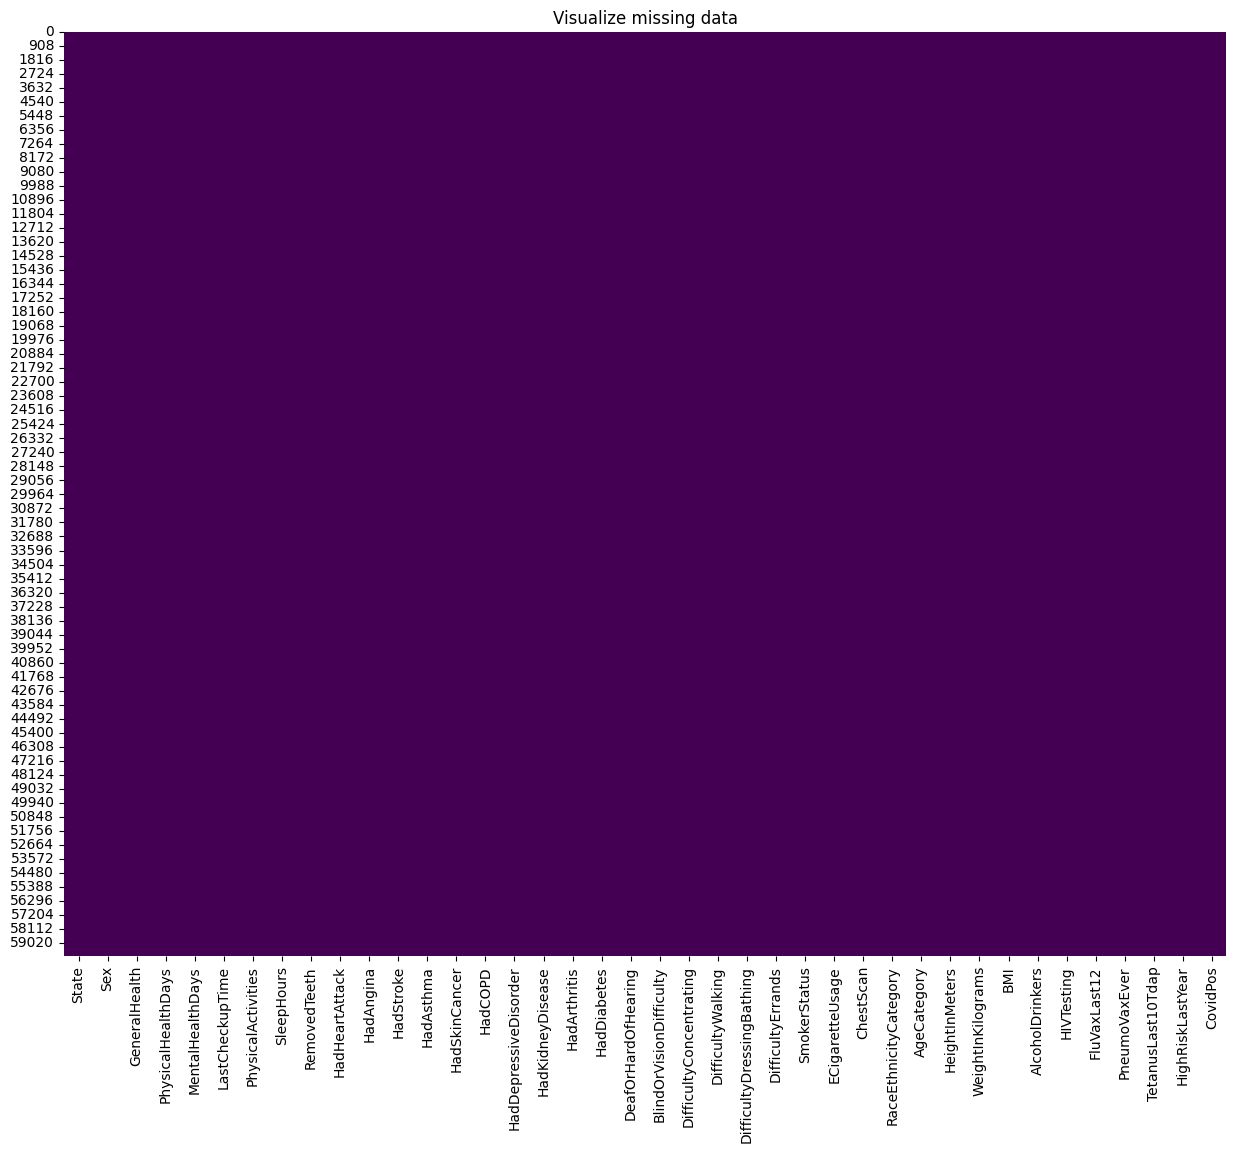

0


In [87]:
# Visualize missing data
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualize missing data')
plt.show()
print(df["BMI"].isnull().sum())



### Features Distribution

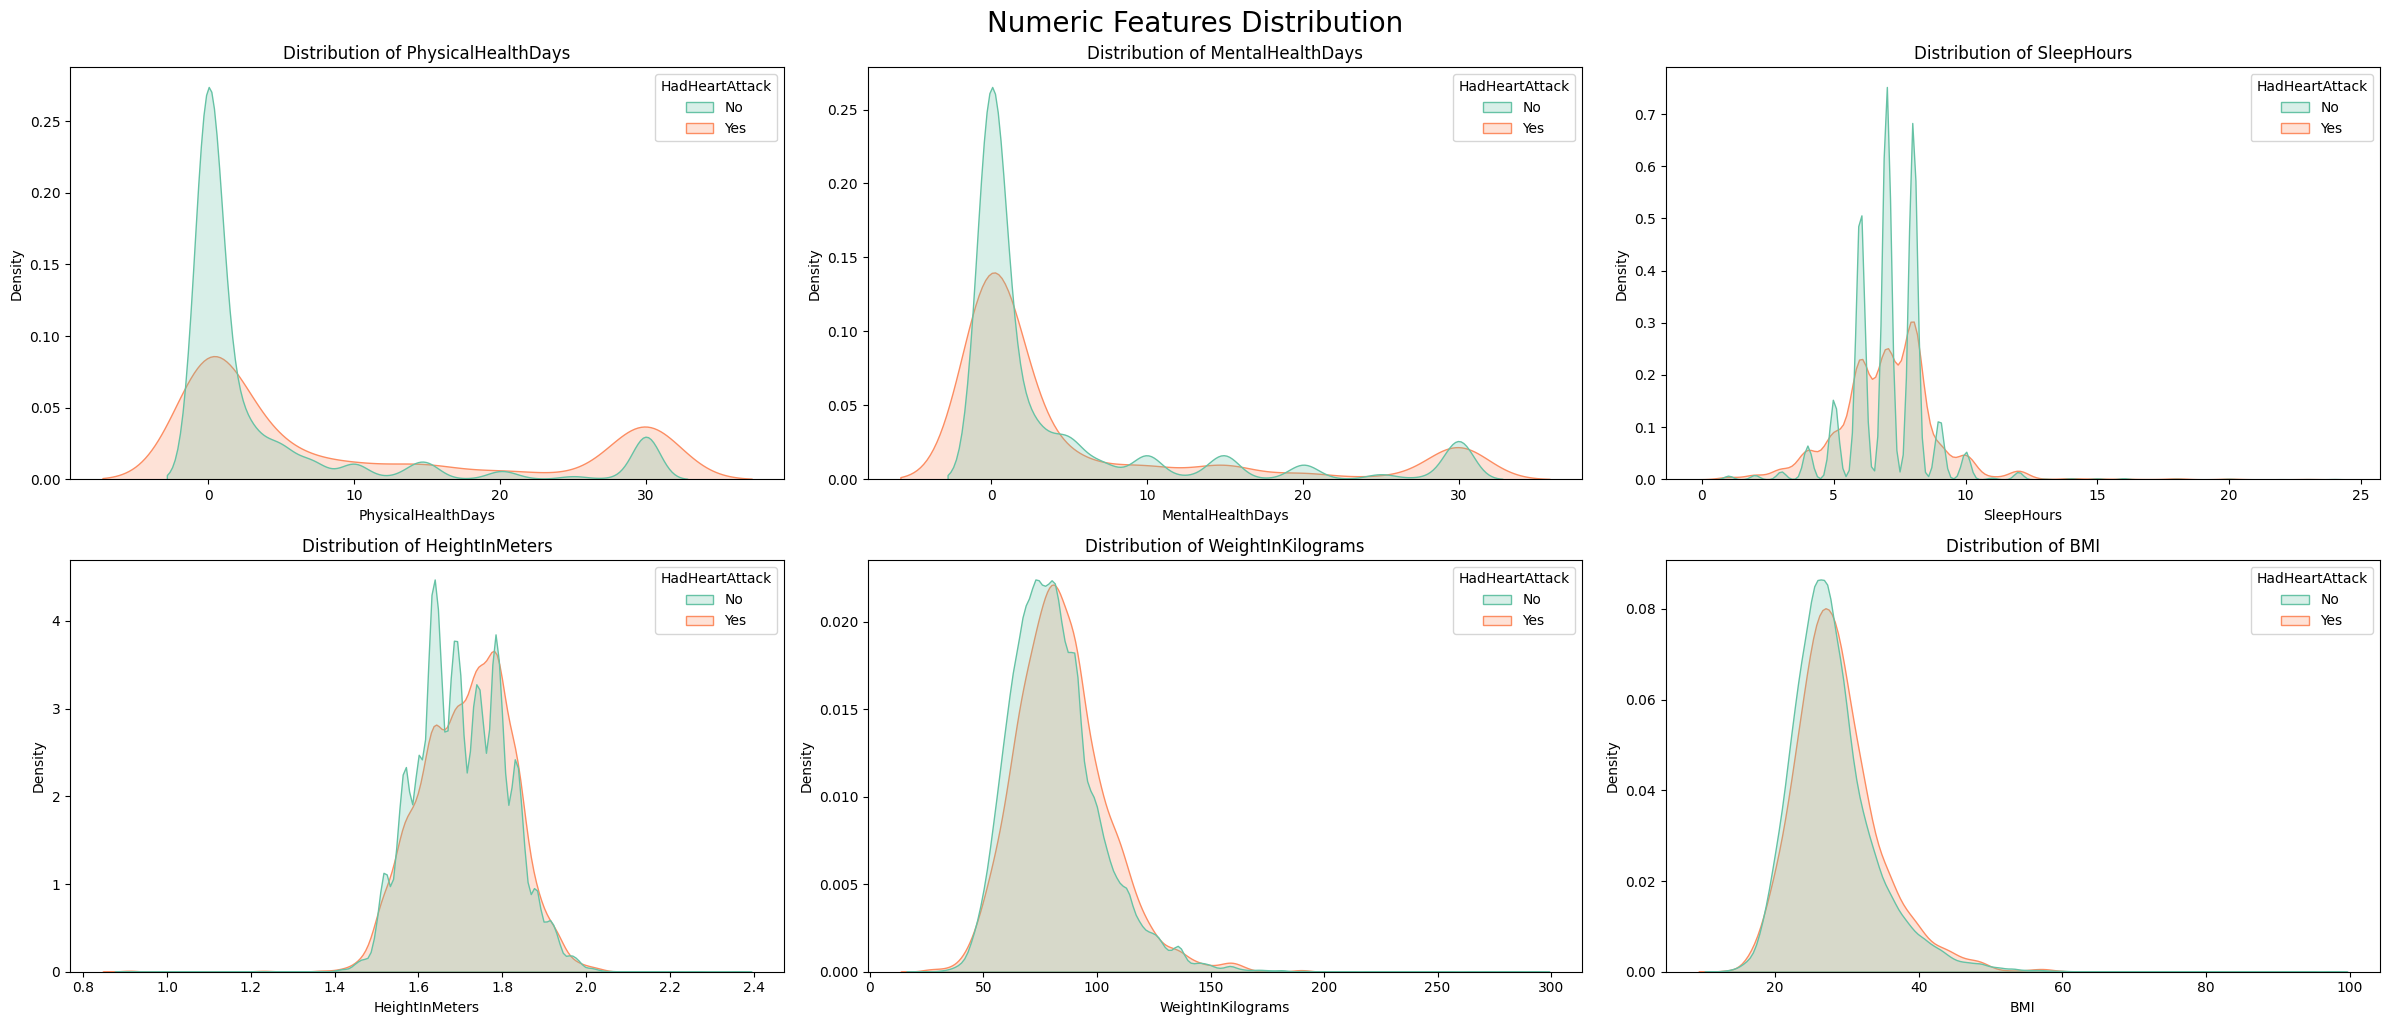

In [88]:
# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
axes = axes.flatten()
plt.title('Numeric Features Distribution', fontsize=20, y=1.02)
for idx, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, hue='HadHeartAttack', fill=True, common_norm=False, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Numeric Features Distribution', fontsize=20, y=1.02)
plt.show()


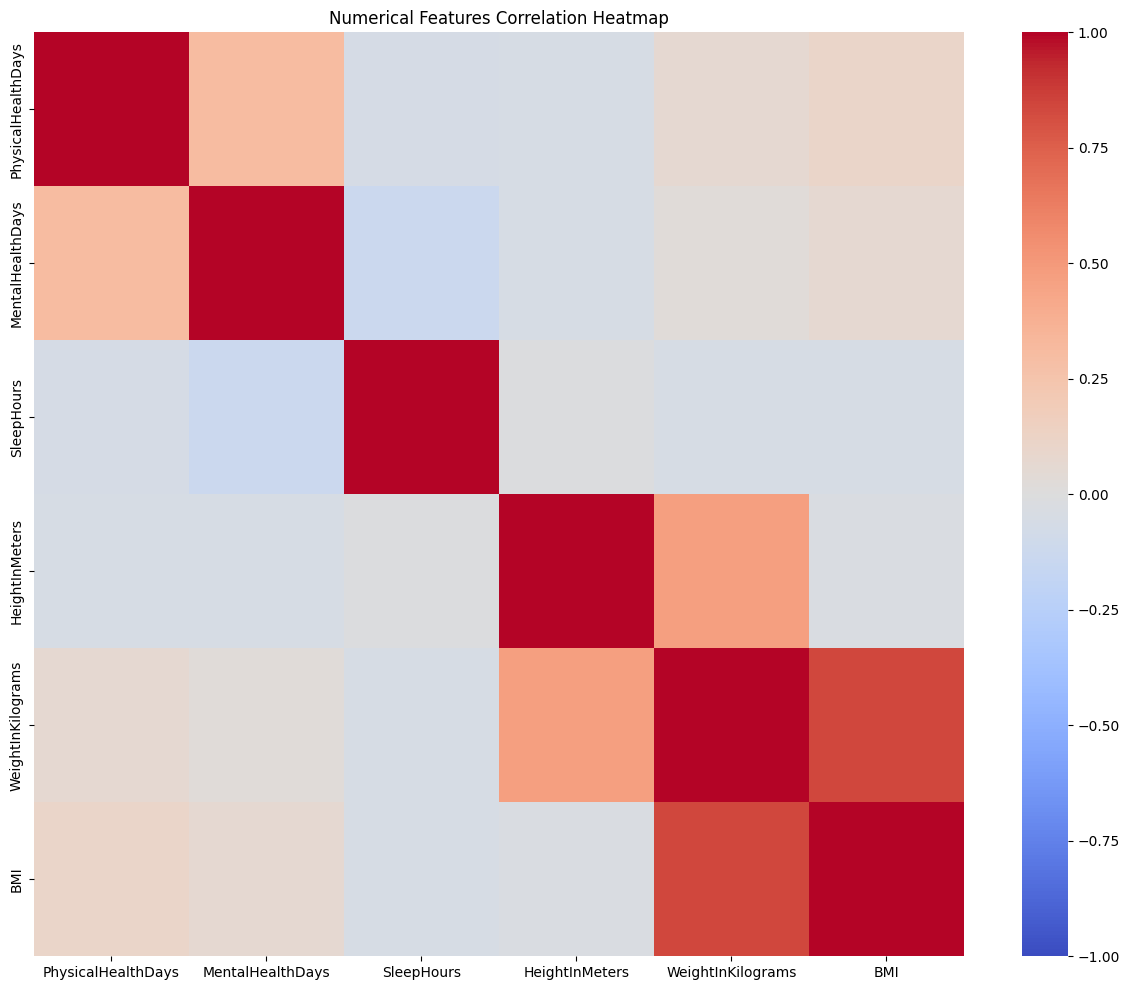

In [89]:
# Numerical Features Correlation
plt.figure(figsize=(15,12))
corr = df.select_dtypes(include = 'number').corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

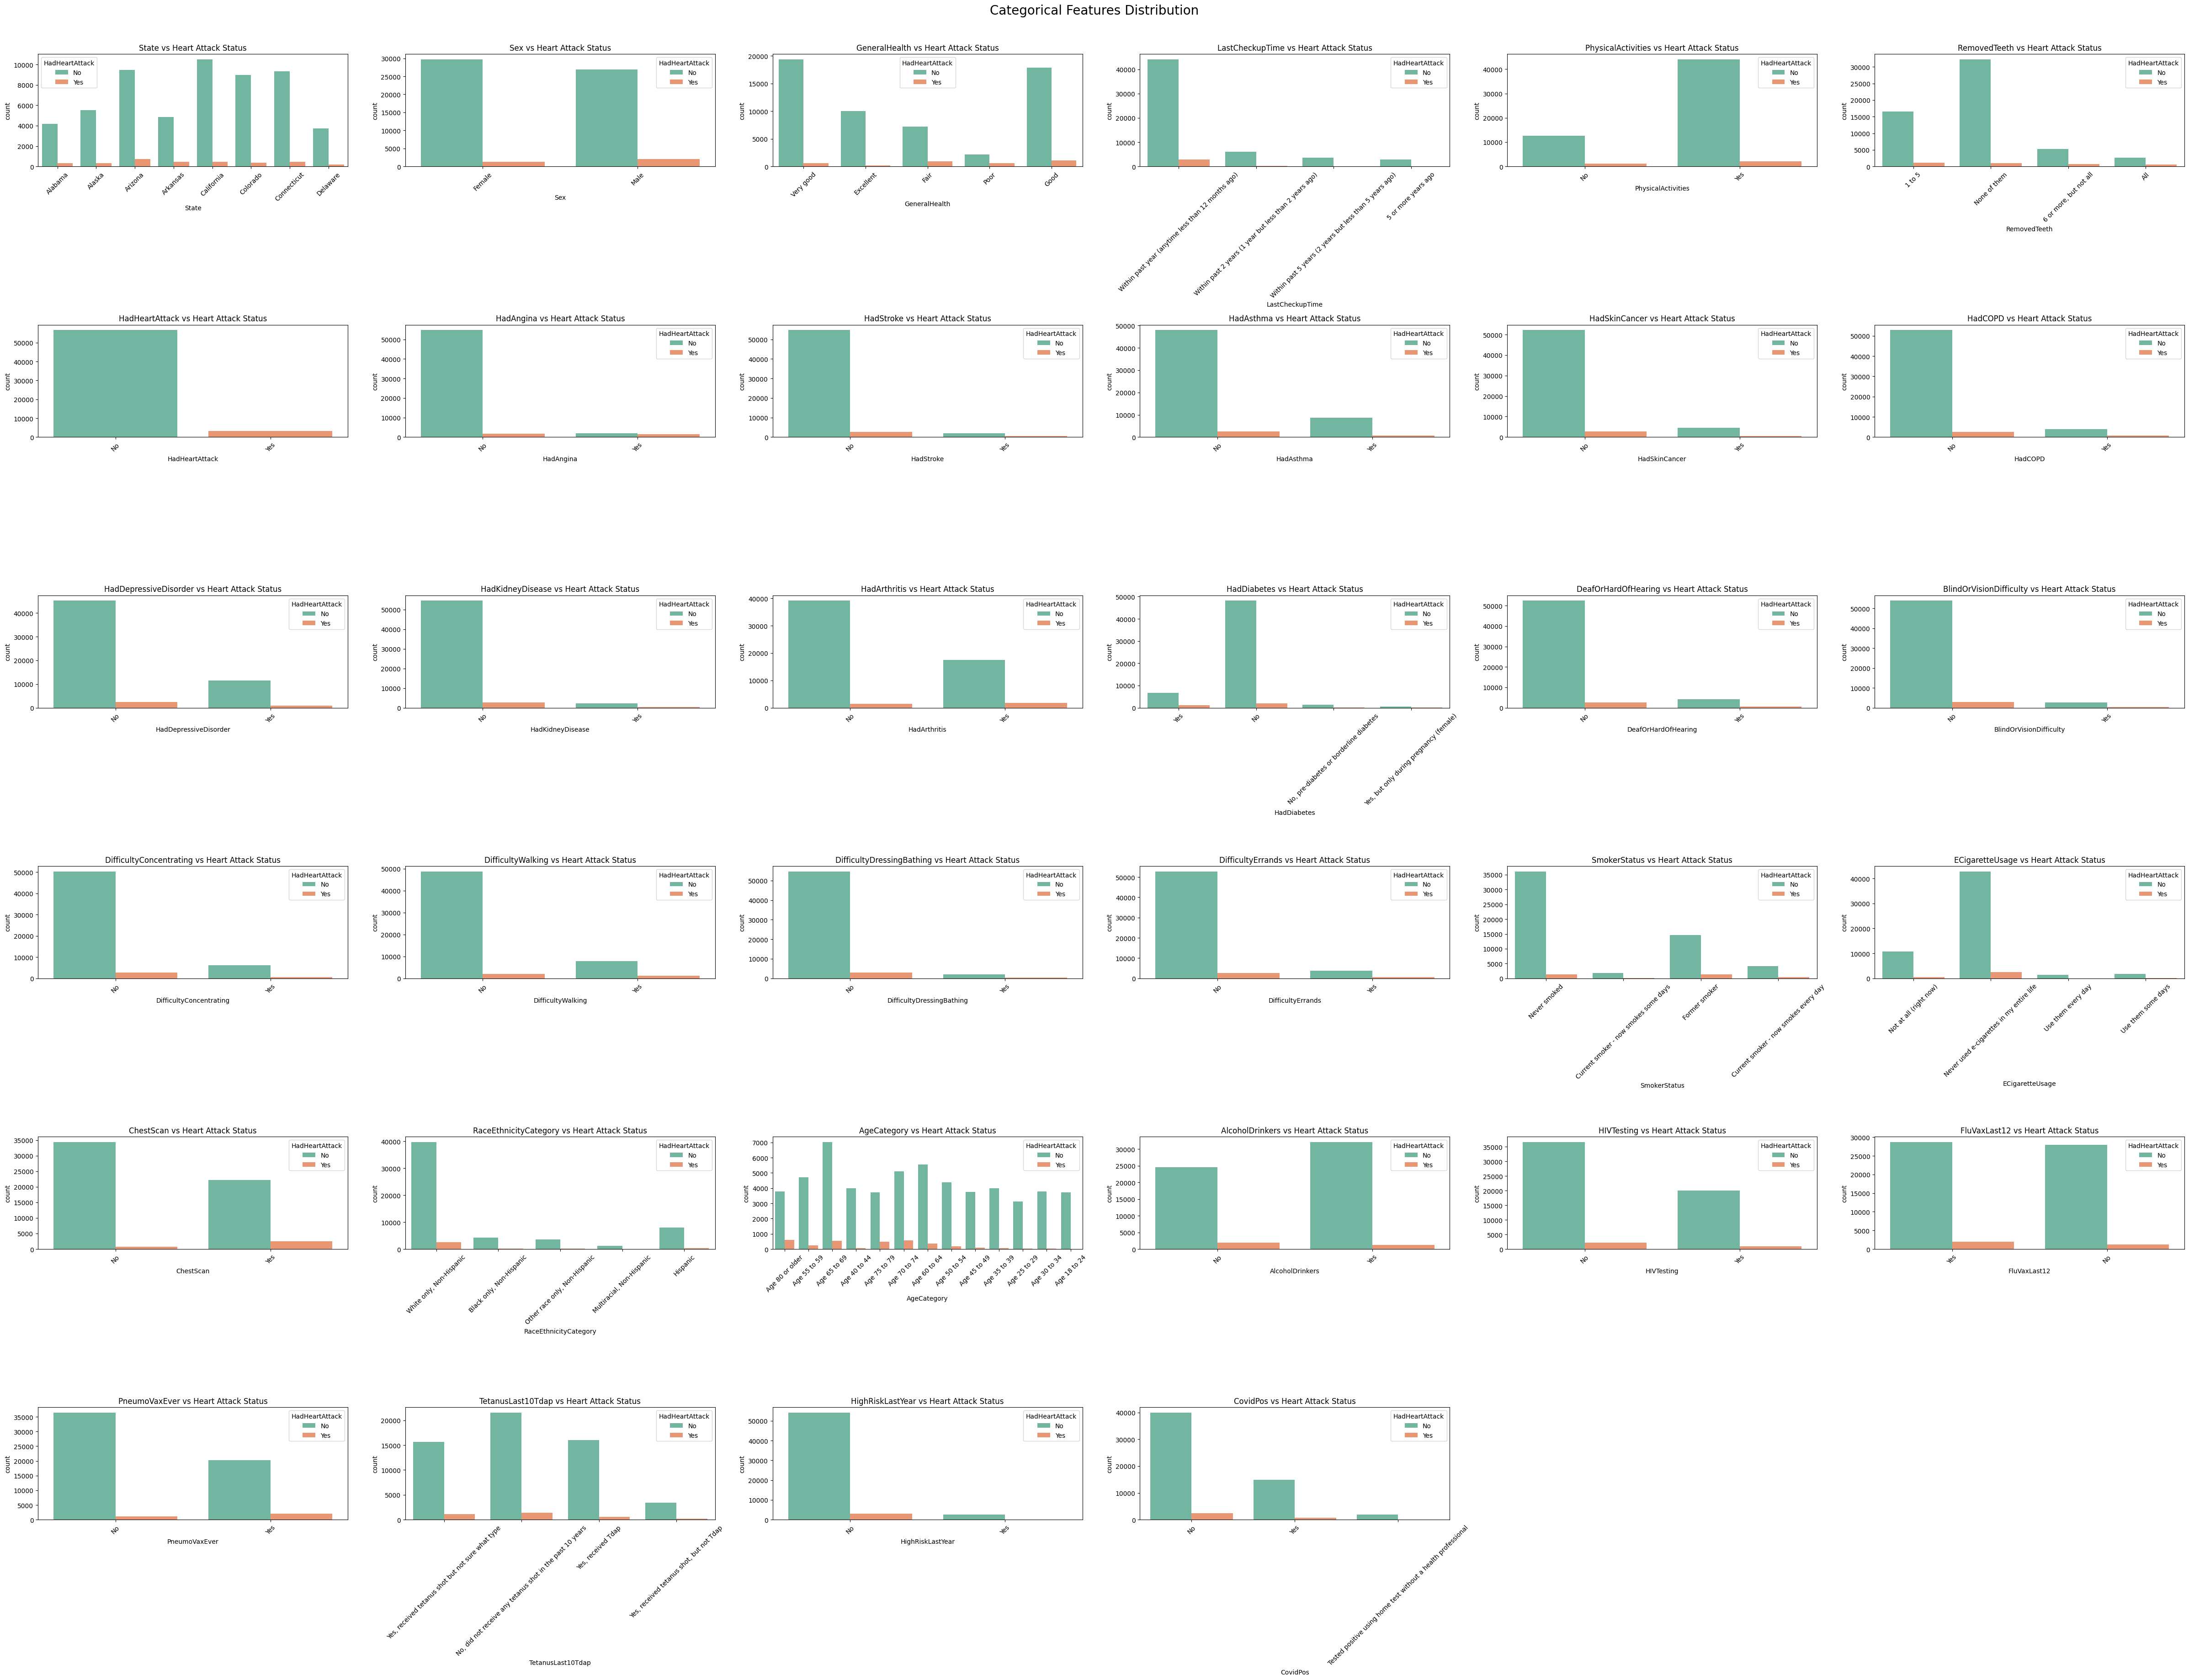

In [90]:
# Categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 6
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='HadHeartAttack', palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Heart Attack Status')
    axes[idx].tick_params(axis='x', rotation=45)


for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Categorical Features Distribution', fontsize=20, y=1.02)
plt.show()


In [91]:
df.describe(include='object').T

,count,unique,top,freq
State,59903,8,California,10952
Sex,59903,2,Female,30929
GeneralHealth,59903,5,Very good,19970
LastCheckupTime,59903,4,Within past year (anytime less than 12 months ...,47039
PhysicalActivities,59903,2,Yes,46030
RemovedTeeth,59903,4,None of them,33155
HadHeartAttack,59903,2,No,56647
HadAngina,59903,2,No,56519
HadStroke,59903,2,No,57359
HadAsthma,59903,2,No,50553


### test each feature is significant or not

In [ ]:
from scipy.stats import pointbiserialr
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd

# Convert binary target variable to numeric
df["HadHeartAttack_bin"] = df["HadHeartAttack"].map({"Yes": 1, "No": 0})

# Identify categorical and numerical features
categorical_cols = df.select_dtypes(include="object").columns.drop("HadHeartAttack")
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("HadHeartAttack_bin")

results = []

# Evaluate numerical features using point-biserial correlation and AUC
for col in numerical_cols:
    try:
        temp = df[[col, "HadHeartAttack_bin"]].dropna()
        if temp[col].nunique() > 1:
            r, p_val = pointbiserialr(temp["HadHeartAttack_bin"], temp[col])
            auc = roc_auc_score(temp["HadHeartAttack_bin"], temp[col])
        else:
            r, p_val, auc = np.nan, np.nan, np.nan
    except:
        r, p_val, auc = np.nan, np.nan, np.nan
    results.append({
        "Feature": col,
        "Type": "Numerical",
        "Test": "Point-Biserial",
        "p-value": p_val,
        "Effect Size": r,
        "AUC": auc
    })

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
mi_scores = mutual_info_classif(df_encoded, df["HadHeartAttack_bin"], discrete_features=True)

# Store mutual information scores with corresponding original feature names
mi_summary = pd.DataFrame({
    "OneHotFeature": df_encoded.columns,
    "Mutual Information": mi_scores
})
mi_summary["OriginalFeature"] = mi_summary["OneHotFeature"].apply(lambda x: x.split("_")[0])

# Aggregate mutual information scores by original feature
mi_aggregated = mi_summary.groupby("OriginalFeature").agg({
    "Mutual Information": ["max", "mean"]
}).reset_index()
mi_aggregated.columns = ["Feature", "Max Mutual Info", "Avg Mutual Info"]
mi_aggregated = mi_aggregated.sort_values("Max Mutual Info", ascending=False)

# Append mutual information results to the results list
for _, row in mi_aggregated.iterrows():
    results.append({
        "Feature": row["Feature"],
        "Type": "Categorical",
        "Test": "Mutual Information",
        "p-value": np.nan,
        "Effect Size": row["Max Mutual Info"],
        "AUC": np.nan
    })

# Create final dataframe
results_df = pd.DataFrame(results)

# Determine significance
def determine_significance(row):
    if row["Type"] == "Numerical":
        return row["p-value"] < 0.05 if not pd.isna(row["p-value"]) else False
    elif row["Type"] == "Categorical":
        return row["Effect Size"] > 0.01
    else:
        return False

results_df["Significant"] = results_df.apply(determine_significance, axis=1)


display(results_df)


,Feature,Type,Test,p-value,Effect Size,AUC,Significant
0,PhysicalHealthDays,Numerical,Point-Biserial,1.191627e-267,0.142086,0.625658,True
1,MentalHealthDays,Numerical,Point-Biserial,1.134651e-10,0.026340,0.498889,True
2,SleepHours,Numerical,Point-Biserial,8.123487e-01,0.000970,0.498958,False
3,HeightInMeters,Numerical,Point-Biserial,2.923344e-10,0.025748,0.537945,True
4,WeightInKilograms,Numerical,Point-Biserial,1.486017e-16,0.033730,0.552272,True
5,BMI,Numerical,Point-Biserial,1.957167e-10,0.026001,0.539121,True
6,HadAngina,Categorical,Mutual Information,NaN,0.041090,NaN,True
7,ChestScan,Categorical,Mutual Information,NaN,0.015096,NaN,True
8,DifficultyWalking,Categorical,Mutual Information,NaN,0.010206,NaN,True
9,HadStroke,Categorical,Mutual Information,NaN,0.009851,NaN,False


### Binning
> Binning some numerical features for better insights

In [77]:
# BMI Category
bins = [0, 18.5, 25, 30, 35, np.inf]
labels = ['Underweight', 'Normal weight',
          'Overweight', 'Obese', 'Extremly Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins, labels=labels)

df["BMI_Category"].value_counts()


BMI_Category
Overweight        24044
Normal weight     16865
Obese             11361
Extremly Obese     6617
Underweight        1016
Name: count, dtype: int64

In [93]:
# Plotting BMI Category distribution
plt.figure(figsize=(17, 6))
sns.countplot(x='BMI_Category', data=df, palette='Set2')
plt.title('Distribution of BMI Categories')
plt.show()

ValueError: Could not interpret value `BMI_Category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1700x600 with 0 Axes>

In [ ]:
# SleepHours Category
sleep_bins = [0, 4, 6, 8, 10, np.inf]
sleep_labels = ['Very Short Sleep', 'Short Sleep', 'Normal Sleep', 'Long Sleep', 'Very Long Sleep']

df['SleepHours_Category'] = pd.cut(df['SleepHours'], bins=sleep_bins, labels=sleep_labels)

df['SleepHours_Category'].value_counts()


SleepHours_Category
Normal Sleep        262203
Short Sleep         125183
Long Sleep           31409
Very Short Sleep     18119
Very Long Sleep       5153
Name: count, dtype: int64

In [94]:
# Plotting SleepHours Category distribution
plt.figure(figsize=(17, 6))
sns.countplot(x='SleepHours_Category', data=df, palette='Set2')
plt.title('Distribution of SleepHours Categories')
plt.show()

ValueError: Could not interpret value `SleepHours_Category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1700x600 with 0 Axes>

> Adding more binning features ...

### EDA

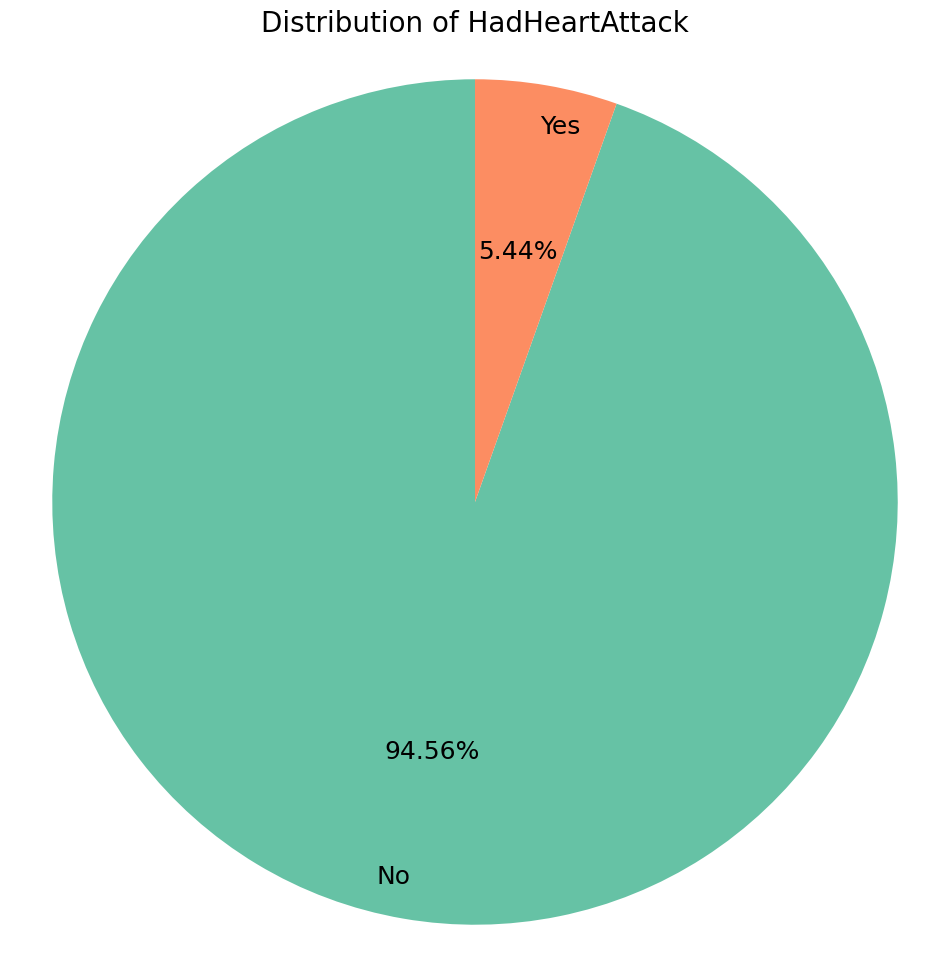

In [95]:
counts = df['HadHeartAttack'].value_counts()
palette_color = sns.color_palette('Set2')
plt.figure(figsize=(12,12))
plt.pie(counts, colors=palette_color, labels=counts.index,
        autopct='%1.2f%%', startangle=90, textprops={'fontsize': 18}, labeldistance=0.9)

plt.title('Distribution of HadHeartAttack', fontsize=20)
plt.axis('equal')
plt.show()


> Only there are 5.68% patients that have heart disease


#### Some 2 combined features may have better significance

In [96]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='BMI_Category',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each BMI Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `BMI_Category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1700x600 with 0 Axes>

##### The age of patients ?

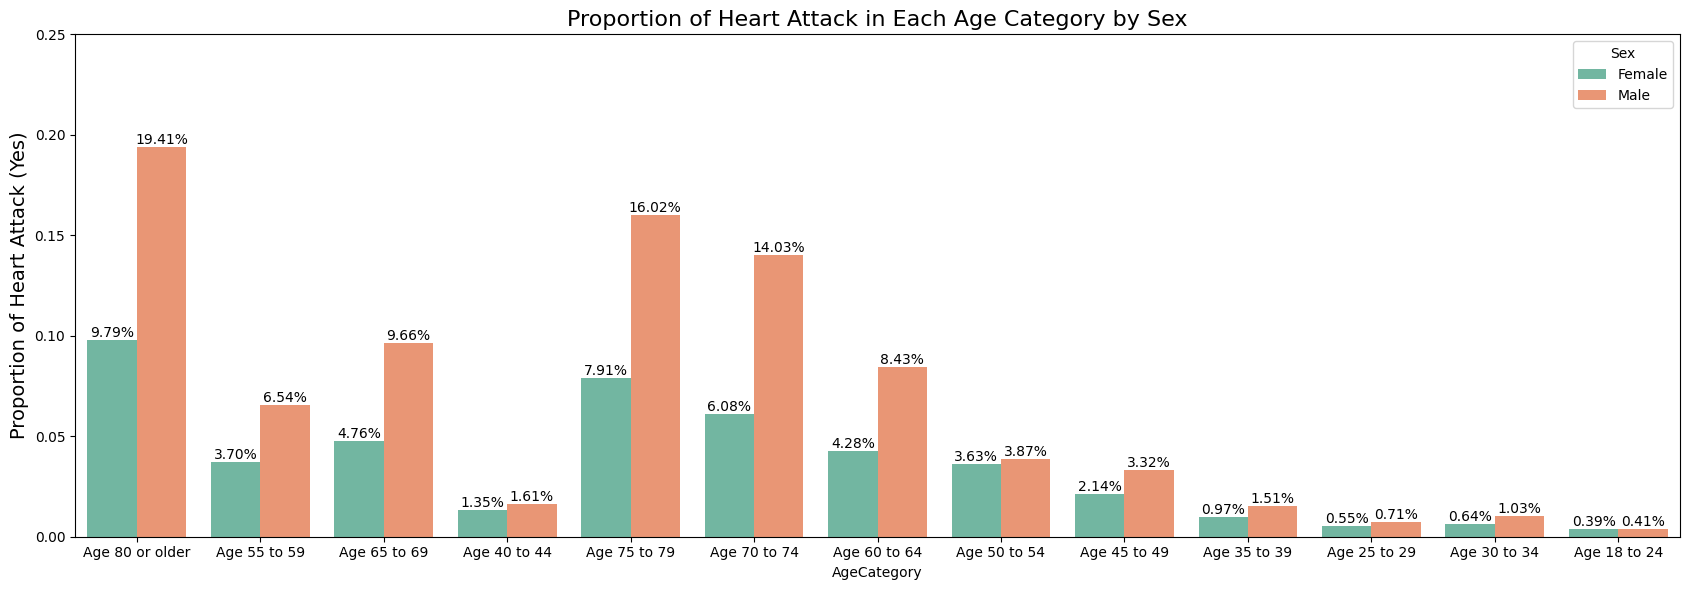

In [97]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='AgeCategory',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Age Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.25) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### How many patients that have heart disease are smoking ?

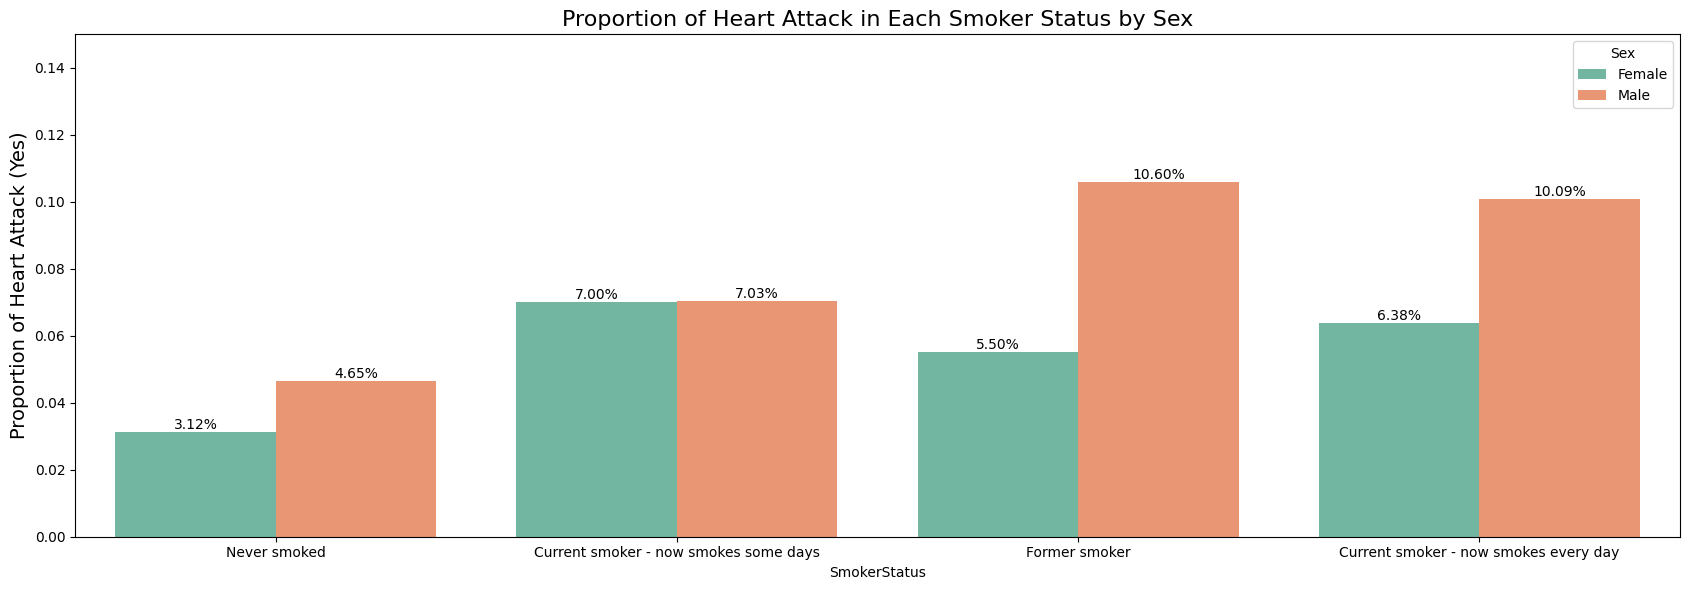

In [98]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SmokerStatus',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Smoker Status by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.15) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### Sleep vs Heart Disease

In [99]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SleepHours_Category',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each SleepHours category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.3) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `SleepHours_Category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1700x600 with 0 Axes>

##### Checkup time with Astham

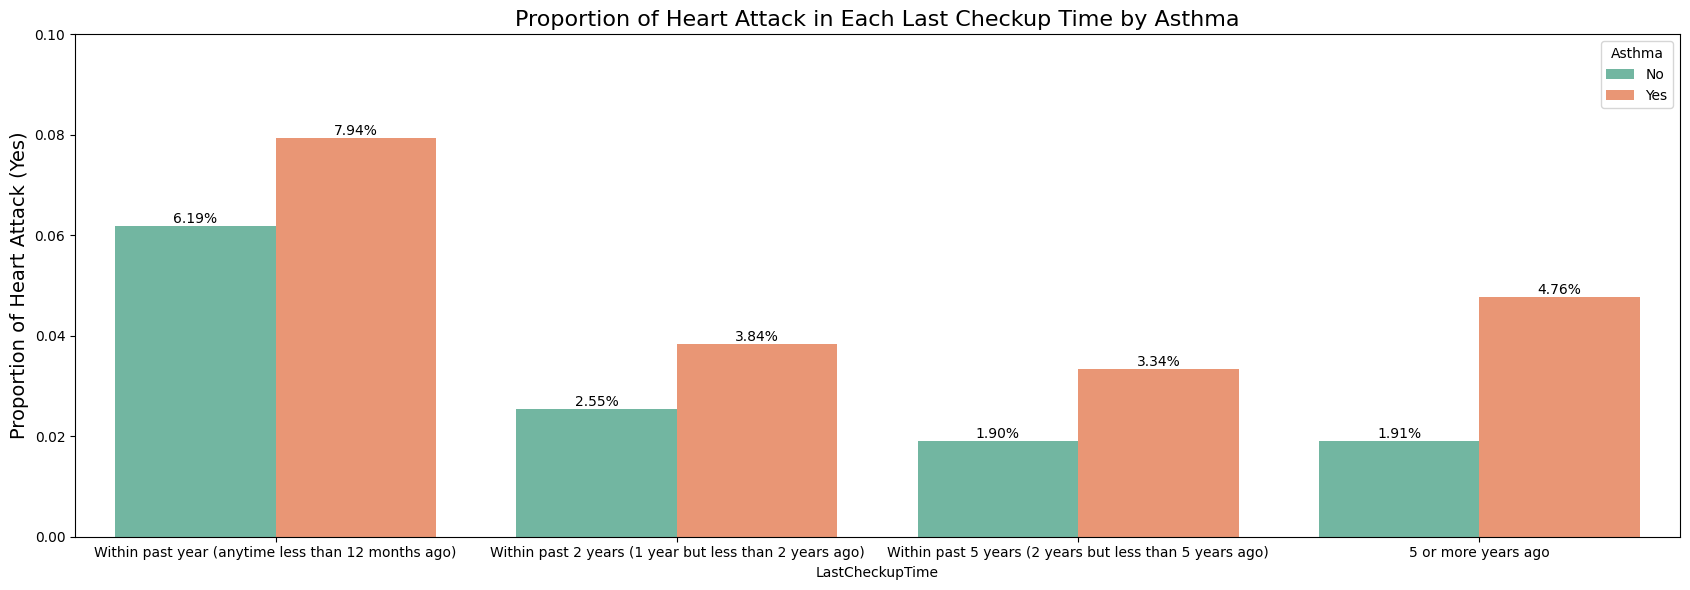

In [ ]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='LastCheckupTime',
    y='HeartAttackBinary',
    hue='HadAsthma',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Last Checkup Time by Asthma', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Asthma')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### ECigarette and Dinking habits with heart disease

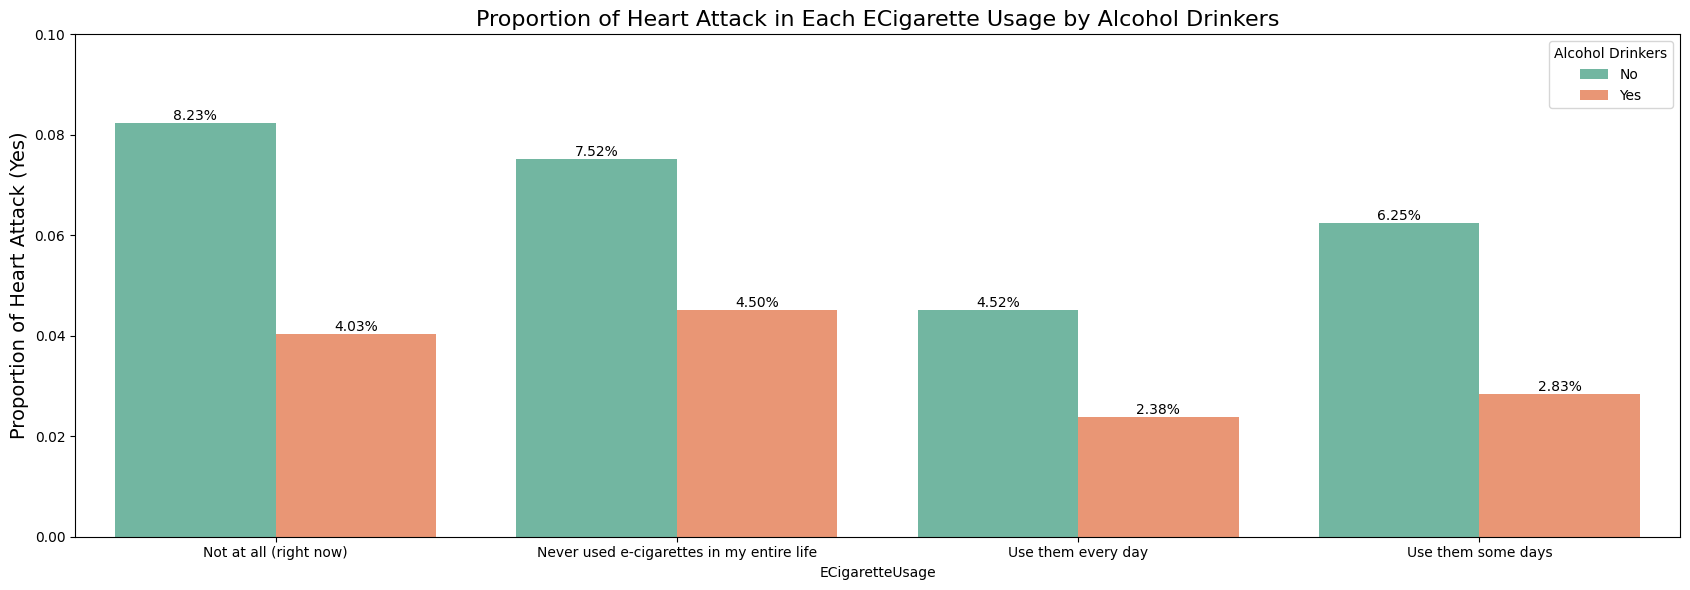

In [ ]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='ECigaretteUsage',
    y='HeartAttackBinary',
    hue='AlcoholDrinkers',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each ECigarette Usage by Alcohol Drinkers', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Alcohol Drinkers')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### Outliers

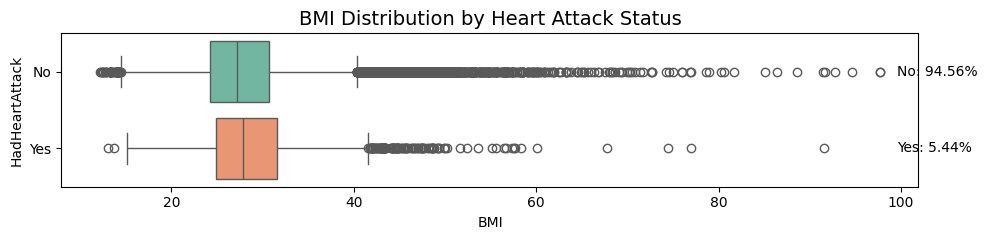

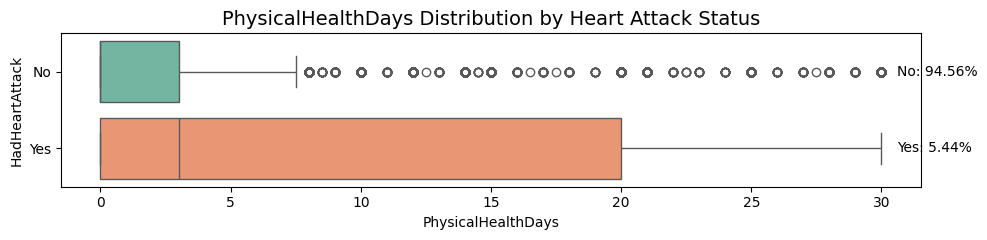

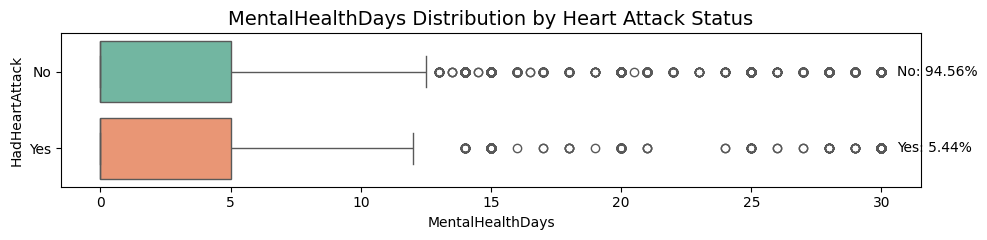

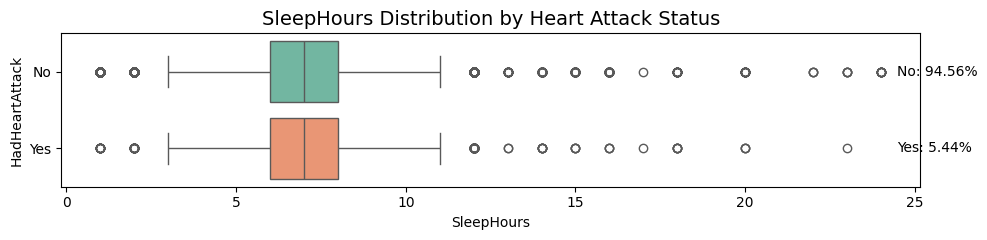

In [100]:
# Features to plot
features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Loop through each feature to generate the boxplots
for feature in features:
    plt.figure(figsize=(10, 2.5), dpi=100)
    
    # Create the boxplot
    ax = sns.boxplot(
        data=df,
        x=feature,
        y='HadHeartAttack',
        orient='h',
        hue='HadHeartAttack',  # Add hue to avoid the warning
        palette='Set2',
        legend=False  # Disable the legend
    )
    
    # Title for the plot
    plt.title(f'{feature} Distribution by Heart Attack Status', fontsize=14)
    
    # Calculate proportions for each 'HadHeartAttack' category
    counts = df['HadHeartAttack'].value_counts()
    total = counts.sum()
    
    # Prepare the labels with percentages
    labels = []
    for category in df['HadHeartAttack'].unique():
        if pd.isna(category):
            continue
        ratio = counts[category] / total * 100
        labels.append(f"{category}: {ratio:.2f}%")
    
    # Adding labels with proportions to the plot
    for i, label in enumerate(labels):
        ax.text(
            df[feature].max() * 1.02,  # Position of the label (adjusted to the max value of the feature)
            i,  # Position of the label in the 'HadHeartAttack' categories
            label,
            verticalalignment='center',
            fontsize=10,
            color='black'
        )
    
    # Ensure the layout fits and displays the plot
    plt.tight_layout()
    plt.show()


> Add methods to deal with outliers

#### For global outliers

In [105]:
from src.data_preprocessing.outlier_transformation import transform_outliers, plot_transformed, check_normality, qq_plot

ModuleNotFoundError: No module named 'src'

##### Log Transformation

In [27]:
df_transformed = transform_outliers(df, 'BMI', method='log')

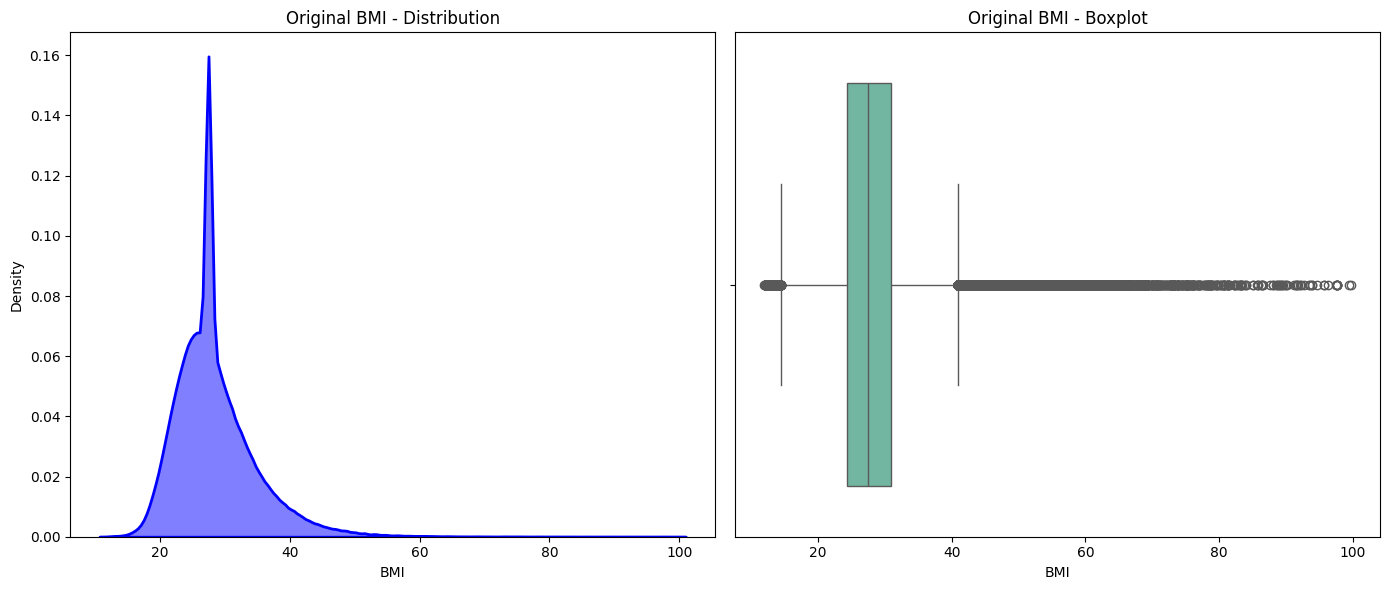

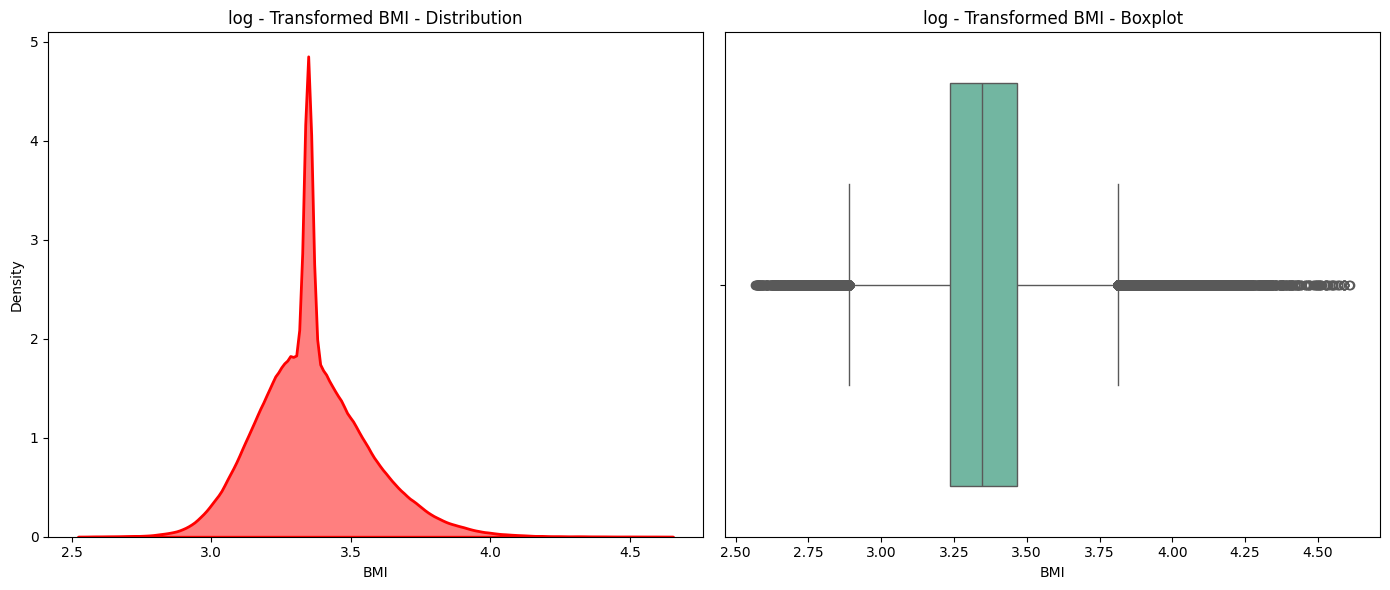

In [28]:
plot_transformed(df, 'BMI', df_transformed, 'BMI', method='log')

In [29]:
# Check normality after transformation
check_normality(df_transformed, 'BMI', method='log')

Shapiro-Wilk Test (log): Statistic = 0.9794591435559357, p-value = 8.725688563852868e-97
log transformation: The data is likely not normally distributed.


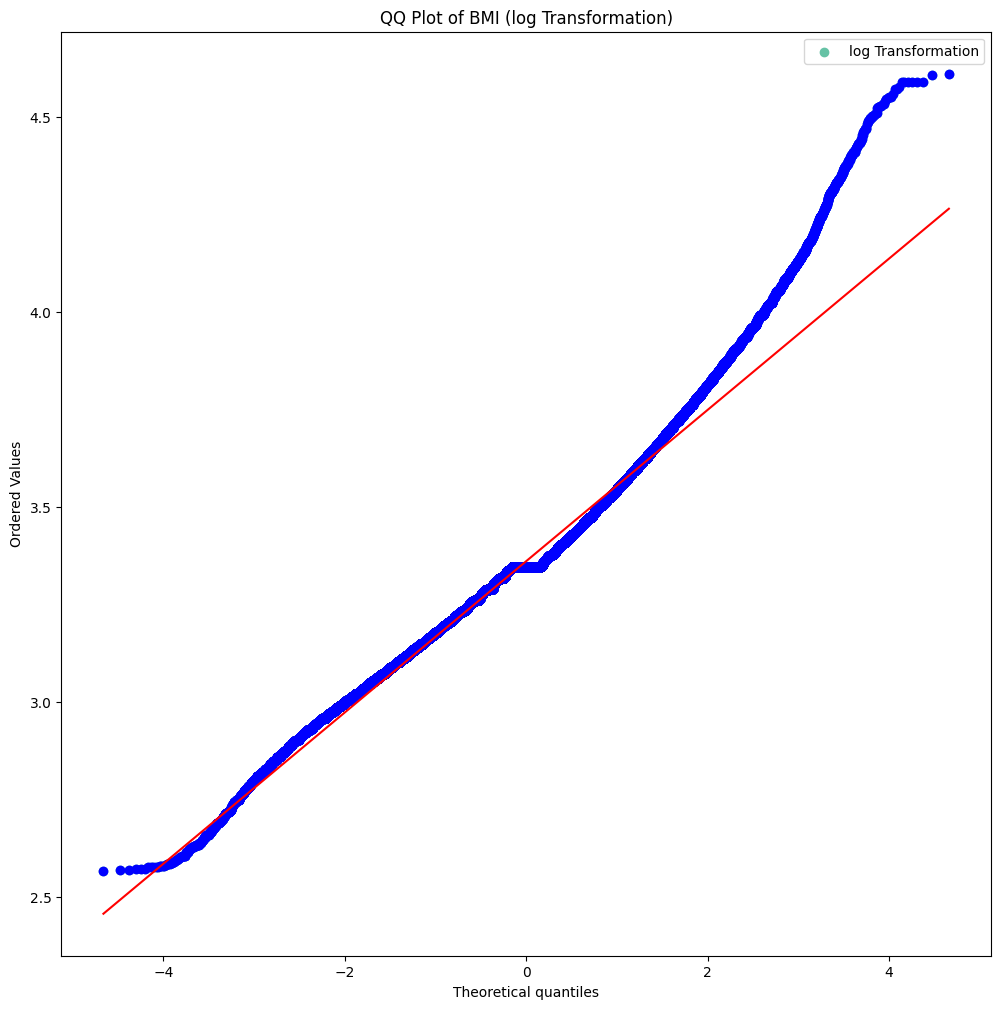

In [30]:
# QQ Plot to check normality visually
qq_plot(df_transformed, 'BMI', method='log')

> Try z_score, IQR, boxcox ...

##### local anomalies(outliers)
> Try  Local Outlier Factor (LOF) or Isolation Forest for detecting local anomalies

### Output new final data

In [103]:
output_path = '../data/cleaned/heart_2022_cleaned_01.csv'
if not os.path.exists(output_path):
    df.to_csv(output_path, index=False)
else:
    print(f"File {output_path} already exists.")